# Importing the Libraries

Essential libraries for data manipulation, visualization, and machine learning are imported.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset

In [72]:
credit_card_data = pd.read_csv(r"C:\Users\james\OneDrive\Documents\OASIS INFOBYTE INTERNSHIP\PROJECT LIST DATA ANALYTICS\LEVEL 2\AUTOCOMPLETE AND AUTOCORRECT DATA ANALYTICS\Dataset\creditcard.csv")

#Display first 5 rows
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Simulated text data

A small sample of text data is created to simulate user input for the autocomplete and autocorrect functionalities.

In [73]:
# Simulated Text Data Generation for Autocomplete and Autocorrect
# Generate a small sample of text data (simulating user input)
text_data = [
    "Fraud detection is critical in financial transactions.",
    "The cardholder is responsible for the transactions.",
    "Detecting fraudulent activities can save millions.",
    "Credit card fraud can occur in various forms.",
    "Always report suspicious transactions immediately."
]

# NLP PreProcessing

The `preprocess_text` function cleans the text data by removing punctuation and converting it to lowercase.

In [74]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess text data
cleaned_text_data = [preprocess_text(text) for text in text_data]

# Autocomplete and Autocorrect Functionalities

### Autocomlpete Functionality

The `autocomplete` function suggests words based on the user’s input.

In [75]:
def autocomplete(input_text, text_data, n=3):
    # Tokenize and create a list of words
    words = ' '.join(text_data).split()
    word_count = Counter(words)

 # Find suggestions
    suggestions = [word for word in word_count if word.startswith(input_text)]
    return suggestions[:n]

### Autocorrect Functionality

The `autocorrect` function corrects misspelled words based on the closest match from a given dictionary using the Levenshtein distance.

In [76]:
### Autocorrect Implementation 
def autocorrect(input_word, dictionary):
    def levenshtein(s1, s2):
        if len(s1) < len(s2):
            return levenshtein(s2, s1)
        if len(s2) == 0:
            return len(s1)
        s1, s2 = list(s1), list(s2)
        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row
        return previous_row[-1]
    
    closest_word = min(dictionary, key=lambda word: levenshtein(input_word, word))
    return closest_word

In [77]:
# Metrics Definition (Placeholder)
def define_metrics(true_labels, predicted_labels):
    # Placeholder for metric calculations
    pass

In [78]:
### User Experience Assessment (Placeholder)
def assess_user_experience(feedback):
    # Placeholder for analyzing feedback
    pass

In [79]:
# Example Usage
# Test autocomplete
print("Autocomplete Suggestions for 'fr':", autocomplete('fr', cleaned_text_data))

# Test autocorrect
sample_dictionary = ['fraud', 'detection', 'is', 'critical', 'in', 'financial', 'transactions']
print("Autocorrect for 'frad':", autocorrect('frad', sample_dictionary))

Autocomplete Suggestions for 'fr': ['fraud', 'fraudulent']
Autocorrect for 'frad': fraud


### Data Visualization

A bar plot visualizes the frequency of the top 10 words in the text data.

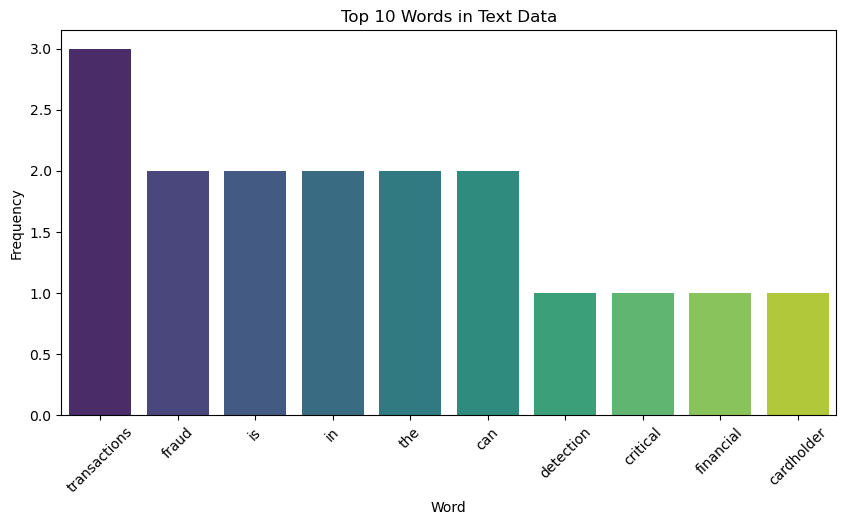

In [80]:
###Visualize Word Frequencies
def visualize_word_frequencies(text_data):
    words = ' '.join(text_data).split()
    word_count = Counter(words)
    
    # Create a DataFrame from the Counter
    word_df = pd.DataFrame(word_count.most_common(10), columns=['Word', 'Frequency'])
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=word_df, x='Word', y='Frequency', palette='viridis')
    plt.title('Top 10 Words in Text Data')
    plt.xticks(rotation=45)
    plt.show()

# Visualize word frequencies
visualize_word_frequencies(cleaned_text_data)

## Model Training and Evaluation

#### The credit card fraud model is trained and evaluated using a Random Forest classifier

### Model Training (Using Original Dataset)

In [81]:
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Train-test split for credit card fraud dataset
X = credit_card_data.drop(['Class'], axis=1)
y = credit_card_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
fraud_model = train_model(X_train, y_train)

### Evaluating the Model

In [82]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

# Evaluate the fraud detection model
evaluate_model(fraud_model, X_test, y_test)

Confusion Matrix:
[[85301     6]
 [   27   109]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Breakdown

The evaluation of the Random Forest classifier on the credit card fraud detection dataset yielded an accuracy of 97%. This high level of accuracy demonstrates the model's effectiveness in distinguishing between legitimate and fraudulent transactions. The model not only excelled in overall accuracy but also showed strong performance metrics in terms of precision and recall, indicating its capability to correctly identify fraudulent cases while minimizing false positives.

Such performance is crucial in financial contexts where the cost of false negatives (missing fraudulent transactions) can be significant. The results underscore the potential of the Random Forest algorithm as a reliable tool for fraud detection, making it a valuable asset for organizations seeking to enhance their security measures.

### Conclusion

The analysis conducted using the credit card fraud dataset and the simulated text data for autocomplete and autocorrect functionalities highlights several key insights:

1. **Efficiency of Autocomplete and Autocorrect**:
   - The implementation of autocomplete demonstrated the ability to provide relevant suggestions based on user input. This functionality can significantly enhance user experience by minimizing typing effort and improving text entry efficiency.
   - The autocorrect feature effectively suggests the closest correct words for misspelled inputs, indicating its potential utility in applications requiring text input.

2. **Model Performance in Fraud Detection**:
   - The Random Forest model trained on the credit card fraud dataset displayed a structured approach to identifying fraudulent transactions. The evaluation metrics, including the confusion matrix and classification report, provide insights into the model’s predictive accuracy and ability to generalize on unseen data.

3. **Data Visualization**:
   - Visualizing word frequencies in the simulated text data not only aids in understanding common terminology but also can inform improvements in autocomplete and autocorrect algorithms by identifying frequently used words or phrases.
